# Sistema difuso para el calculo de la presion arterial

###### En el siguiente ejercicio validaremos el estado de la presion arterial de una persona entre los 20 y 28 años, La presión arterial es una 'representación matemática' de dos fuerzas. El número máximo (sistólica) es la fuerza aplicada sobre las paredes de las arterias cuando el corazón bombea, y el número mínimo (diastólica) es la fuerza aplicada sobre las paredes de las arterias entre los dos latidos cardíacos (por ejemplo, cuando el corazón está en reposo). Se considera que entre 110/70 y 120/80 son unos valores normales.

#### Para empezar importamos lalibreria basica de numpy y skfuzzy que sirve para realizar sistemas de logica difusa y adicional el subpaquete de control que es una API que facilita el desarrollo de sistemas difusos.

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

###### Declaramos nuestras variables iniciales 

* Antecedentes (Entradas)
    * PAS(Precion arterial sistolica):
        * Universo: ¿Cual es la presión máxima que ejerce tu corazón cuando late, en                     escala de 90 a 251?
        * Conjunto borroso: Normal, Media, Alta
            
    * PAS(Precion arterial sistolica):
        * Universo: ¿Cual es la presión máxima que ejerce tu corazón cuando se contrae, en                     escala de 60 a 141?
        * Conjunto borroso: Normal, Media, Alta
        
            
* Consecuensia (Salida)
    * Presion:
       * Universo: ¿Cual es la fuerza que ejerce la sangre contra las paredes de las arterias,                    en escala de 70 a 178?
       * Conjunto borroso: Normal, Media, Alta
       
###### Creamos todas nuestras variables de menbresia de manera interactiva y personalizada

In [2]:
PAS = ctrl.Antecedent(np.arange(90, 251, 1), 'Sistolica')
PAD = ctrl.Antecedent(np.arange(60, 141, 1), 'Distolica')
Presion = ctrl.Consequent(np.arange(70, 178, 1), 'presion')

PAS['Normal'] = fuzz.trimf(PAS.universe, [90, 90, 130])
PAS['Media'] = fuzz.trimf(PAS.universe, [120, 130, 160])
PAS['Alta'] = fuzz.trimf(PAS.universe, [130, 250,250])

PAD['Normal'] = fuzz.trimf(PAD.universe, [60, 60, 85])
PAD['Media'] = fuzz.trimf(PAD.universe, [80, 85, 100])
PAD['Alta'] = fuzz.trimf(PAD.universe, [85, 140,140])

Presion['Normal'] = fuzz.trimf(Presion.universe, [70, 70, 100])
Presion['Media'] = fuzz.trimf(Presion.universe, [93, 100, 120])
Presion['Alta'] = fuzz.trimf(Presion.universe, [100, 177, 177])

Mostramos la grafica de las membresias

/Users/tatianasanchezsoto/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


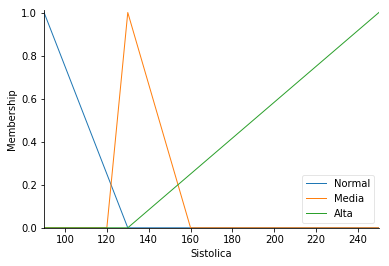

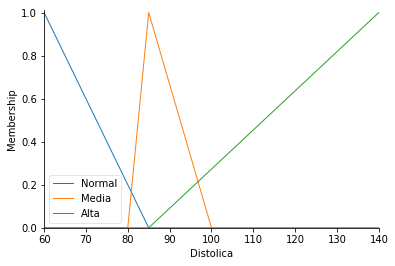

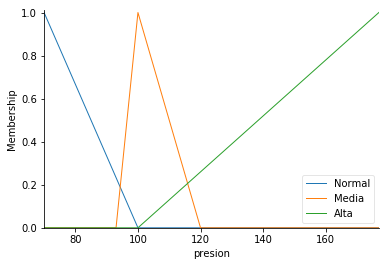

In [3]:
PAS.view()
PAD.view()
Presion.view()

#### Reglas

   * Si la PAD es normal y la PAS normal, entonces la Presion es normal
   * Si La PAD es normal y la PAS Media o
        la PAD es Media y la PAS Normal o PAS Media, entonces la presion es Media
   * Si La a PAD Normal o PAD Media O PAD ALTA y La PAS Alta o
        la PAD ALTA y PAS Normal o PAS Media, entonces la Presion es Alta


Luego de tener las reglas definidas creamos un sistema de control que se encangara de validar las reglas

In [4]:
rule1 = ctrl.Rule(PAD['Normal'] & PAS['Normal'], Presion['Normal'])
rule2 = ctrl.Rule((PAD['Normal'] & PAS['Media']) 
                  | (PAD['Media'] & (PAS['Normal'] | PAS['Media'])), Presion['Media'])
rule3 = ctrl.Rule(((PAD['Normal'] | PAD['Media'] | PAD['Alta']) & PAS['Alta'])
                   | (PAD['Alta'] & (PAS['Normal'] | PAS['Media'])), Presion['Alta'])

Presion_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

###### Instanciamos un simulador donde enviaremos los valores correspondientes a las Entradas con los valores que se encuentren en el universo definido y llamamos el metodo de compute() que se encargara de simular nuestro sistema.

In [5]:
simuladorpresion = ctrl.ControlSystemSimulation(Presion_ctrl)
simuladorpresion.input['Sistolica'] = 90
simuladorpresion.input['Distolica'] = 60

simuladorpresion.compute()

Imprimimos el valor resultante de nuestro sistema y indicamos a la grafica de la presion que nos muestre en que espacio de la grafica se encuentra ubicado nuestro resultado.

79.99999999999999


/Users/tatianasanchezsoto/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


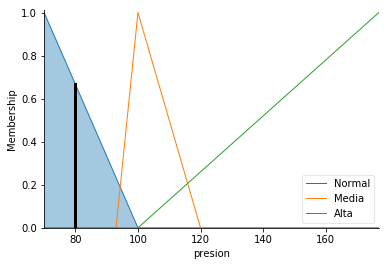

In [6]:
print (simuladorpresion.output['presion'])
Presion.view(sim=simuladorpresion)

### Declaramos nuestros nuevos antecendentes y consecuencia

* Antecedentes (Entradas)
    * RAC(riesgo de ataque al corazon):
        * Universo: ¿Cual es el riego de que la persona sufra un ataque al corazon por                              herencia familiar, en escala de 1 a 9?
        * Conjunto borroso: Bajo, Medio, Alta
            
    * PRE(Precion arterial):
        * Universo: ¿Cual es la fuerza que ejerce la sangre contra las paredes de las                              arterias, en escala de 70 a 178?, en este caso convertimos nuestra                            anterior consecuencia en antecendente
       * Conjunto borroso: Normal, Media, Alta
        
            
* Consecuensia (Salida)
    * Cambio de estilo de vida:
       * Universo: ¿Cual es el cambio de estilo de vida que debe de realizar la persona, en                       escala de 0 a 100?
       * Conjunto borroso: Nada, Poco, Algo, Mucho
       

/Users/tatianasanchezsoto/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


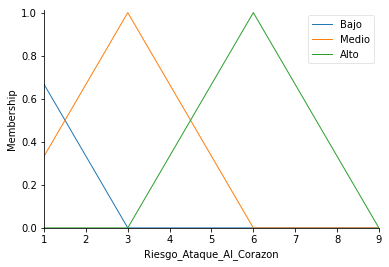

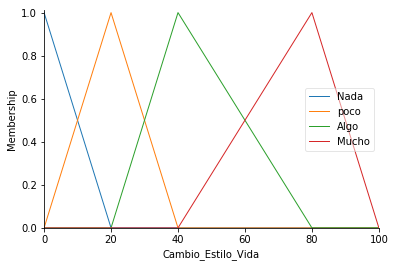

In [12]:
RAC = ctrl.Antecedent(np.arange(1, 10, 1), 'Riesgo_Ataque_Al_Corazon')
Pre = ctrl.Antecedent(np.arange(70, 178, 1), 'Res_presion')
Cambio = ctrl.Consequent(np.arange(0, 101, 1), 'Cambio_Estilo_Vida')

RAC['Bajo'] = fuzz.trimf(RAC.universe, [0, 0, 3])
RAC['Medio']  = fuzz.trimf(RAC.universe, [0, 3, 6])
RAC['Alto']   = fuzz.trimf(RAC.universe, [3, 6, 9])

Pre['Normal'] = fuzz.trimf(Pre.universe, [70, 70, 100])
Pre['Media'] = fuzz.trimf(Pre.universe, [93, 100, 120])
Pre['Alta'] = fuzz.trimf(Pre.universe, [100, 177, 177])

Cambio['Nada'] = fuzz.trimf(Cambio.universe, [0, 0, 20])
Cambio['poco']  = fuzz.trimf(Cambio.universe, [0, 20, 40])
Cambio['Algo']   = fuzz.trimf(Cambio.universe, [20, 40, 80])
Cambio['Mucho']   = fuzz.trimf(Cambio.universe, [40, 80, 100])

RAC.view()
Cambio.view()

#### Reglas

   * Si la PRE es normal y la RAC Bajo, entonces el cambio es Nada
   * Si La PRE es normal y la RAC Medio o
        la PRE es Media y la PAS Bajo, entonces el cambio es Poco
   * Si La a PRE es Media y RAC Medio  o
        la PRE ALTA y La RAC Bajo, entonces el cambio es Algo
   * Si La PRE ALTA y La RAC Medio o
        la RAC Alto y PRE Normal o PRE Media o PRE Alta, entonces el cambio es mucho


Luego de tener las reglas definidas creamos un sistema de control que se encangara de validar las reglas

Y un simulador que se encargara de realizar el proceso de resivir los valores de entrada y con el metodo de compute(), generara el resultado.

Luego imprimimos este resultado y generamos una grafica que nos indica en que pocision se encunetra el cambio de estilo de vida que debe de realizar la persona.

18.950602763892988


/Users/tatianasanchezsoto/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


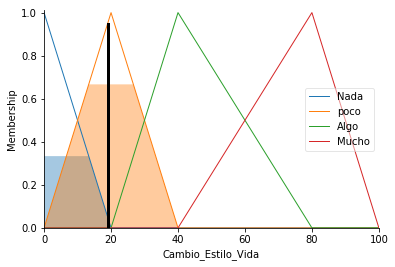

In [14]:
rule4 = ctrl.Rule(Pre['Normal'] & RAC['Bajo'], Cambio['Nada'])

rule5 = ctrl.Rule((Pre['Normal'] & RAC['Medio']) 
                  | (Pre['Media'] & RAC['Bajo']), Cambio['poco'])

rule6 = ctrl.Rule((Pre['Media'] & RAC['Medio']) 
                  | (Pre['Alta'] & RAC['Bajo']), Cambio['Algo'])

rule7 = ctrl.Rule((Pre['Alta'] & (RAC['Medio']) 
                  | (RAC['Alto'] & (Pre['Normal'] | Pre['Media'] | Pre['Alta'])))
                     , Cambio['Mucho'])

Cambio_ctrl = ctrl.ControlSystem([rule4, rule5, rule6, rule7])

simuladorcambio = ctrl.ControlSystemSimulation(Cambio_ctrl)
simuladorcambio.input['Riesgo_Ataque_Al_Corazon'] = 2
simuladorcambio.input['Res_presion'] = simuladorpresion.output['presion']

simuladorcambio.compute()
print (simuladorcambio.output['Cambio_Estilo_Vida'])
Cambio.view(sim=simuladorcambio)
